In [1]:
import argparse
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, List
from obspy import Inventory, UTCDateTime, read, read_inventory
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.mass_downloader import RectangularDomain, \
    Restrictions, MassDownloader
from obspy.geodetics.base import locations2degrees

In [2]:
def download_waveforms_to_storage(
        datastorage: str,
        starttime: UTCDateTime,
        endtime: UTCDateTime,
        minimum_length: float = 0.9,
        reject_channels_with_gaps: bool = True,
        network: Union[str, None] = "IU,II,G",
        station: Union[str, None] = None,
        channel: Union[str, None] = None,
        location: Union[str, None] = None,
        providers: Union[List[str], None] = ["IRIS"],
        minlatitude: float = -90.0,
        maxlatitude: float = 90.0,
        minlongitude: float = -180.0,
        maxlongitude: float = 180.0,
        location_priorities=None,
        channel_priorities=None,
        limit_stations_to_inventory: Union[Inventory, None] = None):

    domain = RectangularDomain(minlatitude=minlatitude,
                               maxlatitude=maxlatitude,
                               minlongitude=minlongitude,
                               maxlongitude=maxlongitude)

    # Create Dictionary with the settings
    rdict = dict(
        starttime=starttime,
        endtime=endtime,
        reject_channels_with_gaps=True,
        # Trace needs to be almost full length
        minimum_length=minimum_length,
        network=network,
        channel=channel,
        location=location,
        location_priorities=location_priorities,
        channel_priorities=channel_priorities,
        limit_stations_to_inventory=limit_stations_to_inventory
    )

    # Remove unset settings
    if not location_priorities:
        rdict.pop('location_priorities')
    if not channel_priorities:
        rdict.pop('channel_priorities')

    restrictions = Restrictions(**rdict)

    # Datastorage:
    waveform_storage = os.path.join(datastorage, 'waveforms')
    station_storage = os.path.join(datastorage, 'stations')

    # Create massdownloader
    mdl = MassDownloader(providers=providers)
    print(f"\n")
    print(f"{' Downloading data to: ':*^72}")
    print(f"MSEEDs: {waveform_storage}")
    print(f"XMLs:   {station_storage}")

    mdl.download(domain, restrictions, mseed_storage=waveform_storage,
                 stationxml_storage=station_storage)
    print("\n")
    print(72 * "*")
    print("\n")

In [9]:
Client("IRIS").get_stations(network="_GSN")

FDSNException: No FDSN services could be discovered at 'http://service.iris.edu'. This could be due to a temporary service outage or an invalid FDSN service address.

In [6]:
# create a folder
#os.makedirs('Files/Tohoku2011/')

# input parameters
datastorage = 'Files/Tohoku2011/'
starttime = UTCDateTime(2011, 3, 11, 5, 47, 32.8)
endtime = starttime + 3600
minimum_length = 0.9
reject_channels_with_gaps = True
network = "_US-TA"
station = "*"
channel = "BH*"
location = None
providers = ["IRIS"]
minlatitude = 38
maxlatitude = 39
minlongitude = 142
maxlongitude = 143
location_priorities = None
channel_priorities = None
limit_stations_to_inventory = None

In [7]:
download_waveforms_to_storage(datastorage,
                              starttime,
                              endtime,
                              network=network,
                              station=station,
                              location=location,
                              channel=channel,
                              providers=providers)

[2022-11-09 16:16:24,408] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for IRIS.
[2022-11-09 16:16:24,415] - obspy.clients.fdsn.mass_downloader - WARNING: Failed to initialize client 'IRIS'.
[2022-11-09 16:16:24,416] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 0 client(s): .
[2022-11-09 16:16:24,417] - obspy.clients.fdsn.mass_downloader - INFO: ============================== Final report
[2022-11-09 16:16:24,417] - obspy.clients.fdsn.mass_downloader - INFO: 0 MiniSEED files [0.0 MB] already existed.
[2022-11-09 16:16:24,417] - obspy.clients.fdsn.mass_downloader - INFO: 0 StationXML files [0.0 MB] already existed.
[2022-11-09 16:16:24,417] - obspy.clients.fdsn.mass_downloader - INFO: Downloaded 0.0 MB in total.




************************* Downloading data to: *************************
MSEEDs: Files/Tohoku2011/waveforms
XMLs:   Files/Tohoku2011/stations


************************************************************************




In [135]:
from obspy.taup import TauPyModel

In [148]:
model = TauPyModel(model="prem")
arrivals = model.get_travel_times(source_depth_in_km=155,
                                  distance_in_degree=67,
                                  phase_list=["P", "PP", "pP", "PKP", "PKIKP"])
print(arrivals)

5 arrivals
	P phase arrival at 635.314 seconds
	pP phase arrival at 671.354 seconds
	PP phase arrival at 784.583 seconds
	PP phase arrival at 917.352 seconds
	PP phase arrival at 917.412 seconds


/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):
/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/core/trace.py:2111: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(self.data.dtype, float):
/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/io/stationxml/core.py:84: UserWarning: The StationXML file has version 1.1, ObsPy can deal with version 1.0. Proceed with caution.
  root.attrib["schemaVersion"], SCHEMA_VERSION))
/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/signal/detrend.py:31: FutureW

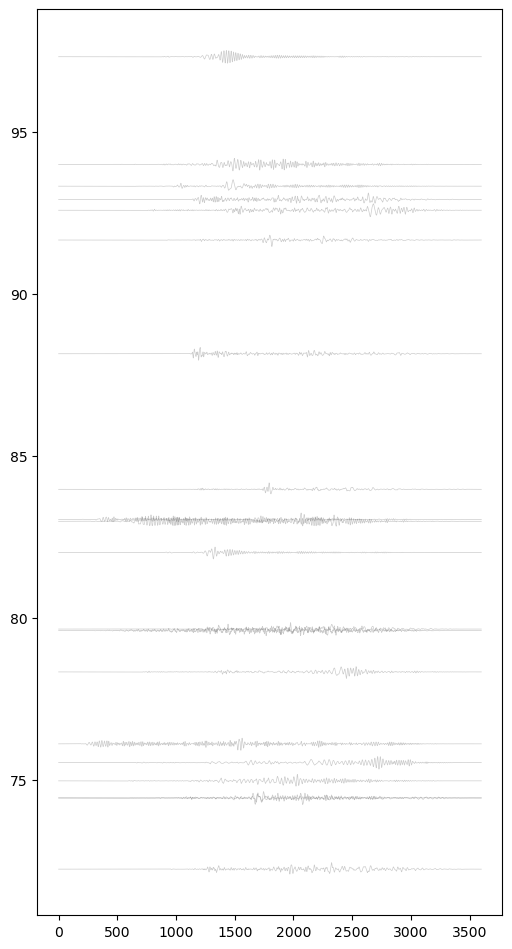

In [186]:
waveform_directory = 'Files/Tohoku2011/waveforms/'
station_directory = 'Files/Tohoku2011/stations/'

MSEED_files = os.listdir(waveform_directory)
XML_files = os.listdir(station_directory)

model = TauPyModel(model="prem")

plt.figure(figsize=[6,12], dpi=100)
for ii in range(len(MSEED_files)):    
    # read the waveform
    st = read(waveform_directory + MSEED_files[ii])
    tr = st[0]
    
    # Filtering with a lowpass on a copy of the original Trace
    tr_filt = tr.copy()
    tr_filt.detrend()
    tr_filt.taper(max_percentage=0.5)
    tr_filt.filter('bandpass', freqmin=0.01, freqmax=0.1, corners=2, zerophase=True)
    
    # read the station metadata
    inv = read_inventory(station_directory + XML_files[ii])
    
    # station location
    stlo = inv[0][0].longitude
    stla = inv[0][0].latitude
    
    # Tohoku 2011 Earthquake location
    evlo = 143.05
    evla = 37.52
    
    # distance in degrees assuming great circle path
    d = locations2degrees(evla, evlo, stla, stlo)
    
    if (d < 70) or (d > 100):
        continue
    
    # calculate travel time and scale to first arrival
    arrivals = model.get_travel_times(source_depth_in_km=20.0,
                                      distance_in_degree=d,
                                      phase_list=["P", "PP", "pP", "PKP", "PKIKP"])
    travel_time = arrivals[0].time
    
    # find the scale
    t_begin = 0
    t_end = 100000#travel_time * 1.5
    t = tr_filt.times()
    x = tr_filt.data
    x_scale = np.max(np.abs(x[(t >= t_begin) & (t < t_end)])) * 5
    #x = x / (1 + np.exp((t-t_end)/10))
    
    # plot the trace
    plt.plot(t, d + x / x_scale, 
             color='k', linewidth=0.5, alpha=0.2)

plt.show()